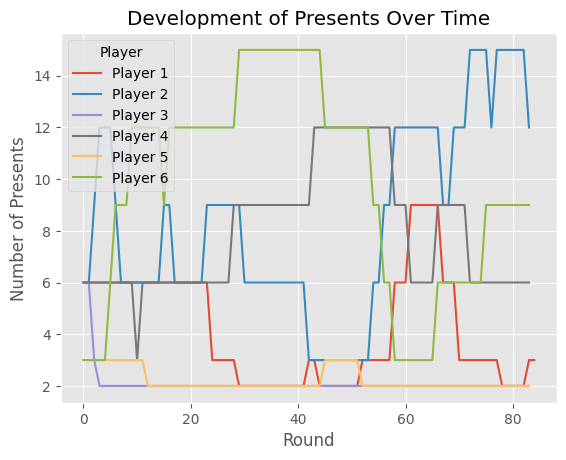

In [16]:
# import csv
import pandas as pd
import matplotlib.pyplot as plt

# import csv file
df = pd.read_csv('simulation_results.csv')

# Create a new column for the count of presents
df['Presents Count'] = df['Presents'].apply(len)

# Pivot the DataFrame to get the count of presents for each player at each round
pivot_df = df.pivot(index='Round', columns='Player', values='Presents Count')

# Plot the data
pivot_df.plot(kind='line')
plt.title('Development of Presents Over Time')
plt.ylabel('Number of Presents')
plt.show()

In [17]:
df

,Round,Player,Dice Roll,Presents,Stolen From,Retaliation Player 1,Retaliation Player 2,Retaliation Player 3,Retaliation Player 4,Retaliation Player 5,Retaliation Player 6,Presents Count
0,0,Player 1,Initial Distribution,"[7, 1]",None,0,0,0,0,0,0,6
1,0,Player 2,Initial Distribution,"[6, 5]",None,0,0,0,0,0,0,6
2,0,Player 3,Initial Distribution,"[8, 0]",None,0,0,0,0,0,0,6
3,0,Player 4,Initial Distribution,"[4, 2]",None,0,0,0,0,0,0,6
4,0,Player 5,Initial Distribution,[3],None,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
500,83,Player 3,5,[],None,0,0,0,0,0,0,2
501,83,Player 4,5,"[0, 1]",None,0,0,0,0,0,0,6
502,83,Player 5,6,[],None,0,0,0,0,0,0,2
503,83,Player 6,4,"[5, 8, 3]",None,0,0,0,0,0,0,9


In [18]:
# filter dice roll == 6
df_only_6 = df[df['Dice Roll'] == "6"]

In [19]:
# export to csv
df_only_6.to_csv('simulation_results_only_6.csv')

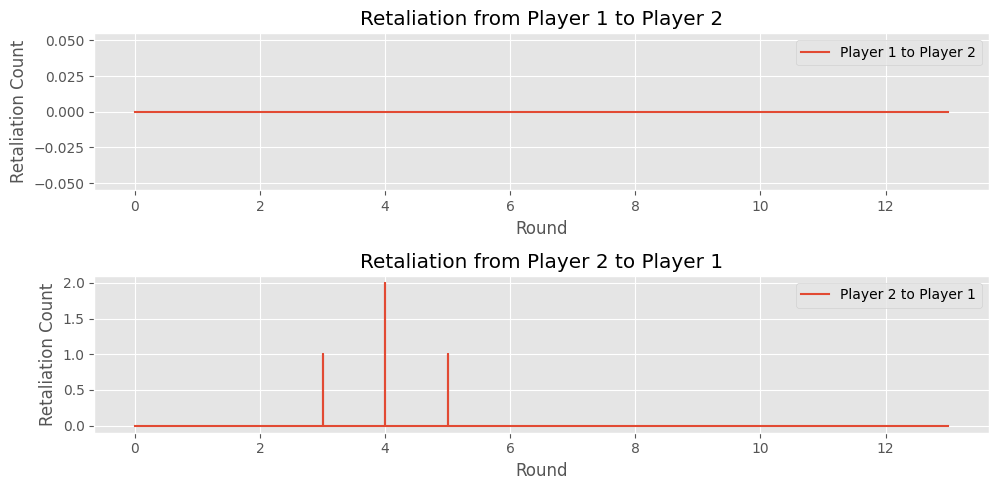

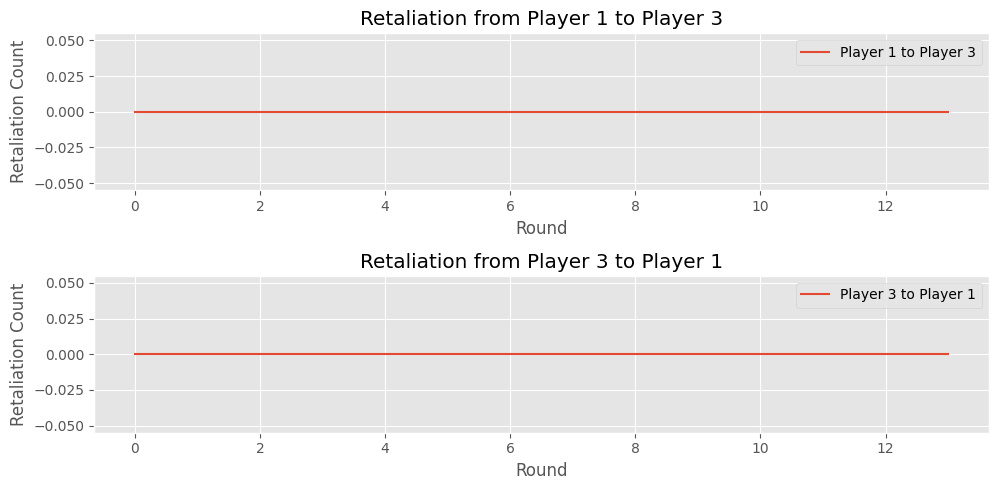

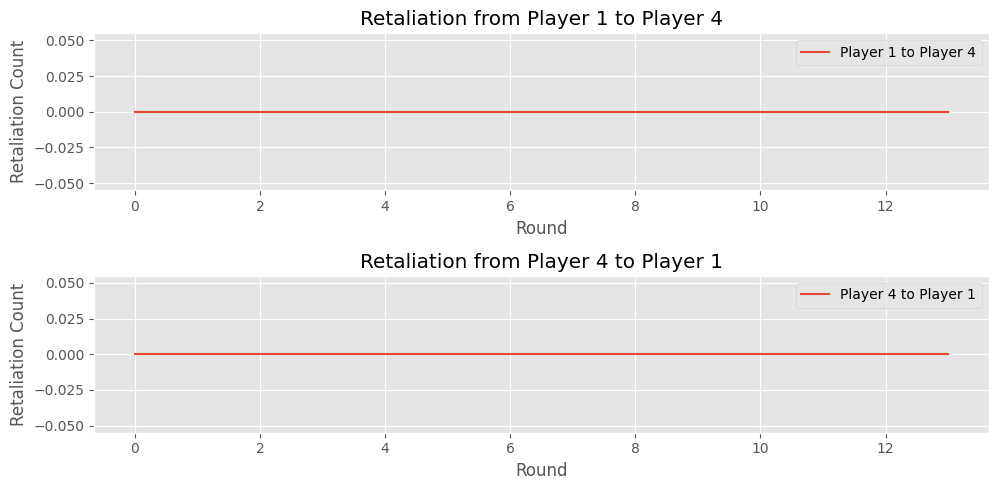

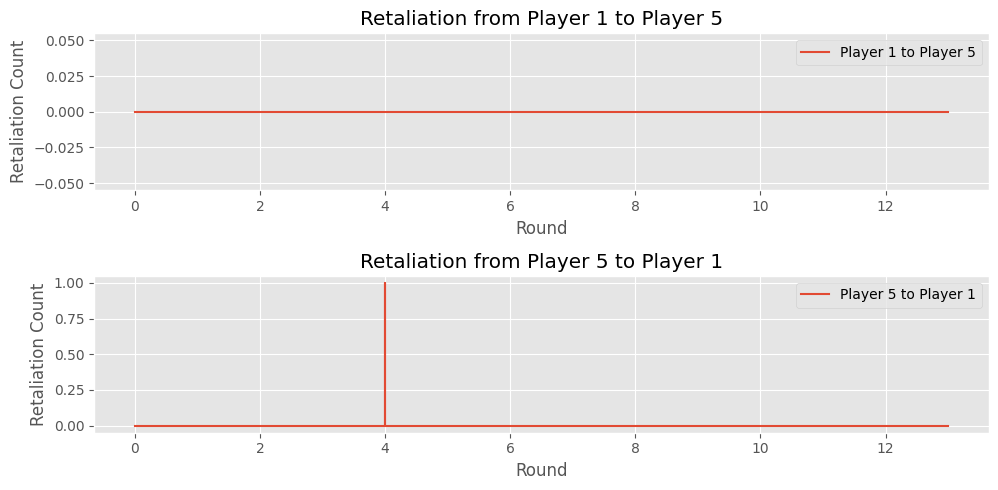

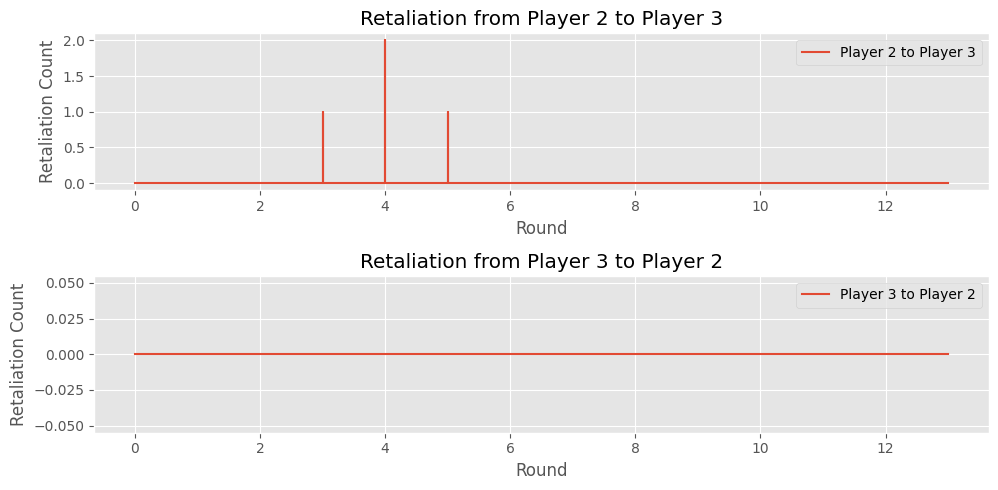

In [11]:
df = pd.read_csv('simulation_results.csv')

# Set the plot style
plt.style.use('ggplot')
data = df

# Function to plot retaliation over time between two players
def plot_retaliation(player1, player2):
    # Extract the rounds and retaliation data for the selected players
    rounds = data['Round']
    retaliation_from_p1_to_p2 = data[f'Retaliation Player {player1}']
    retaliation_from_p2_to_p1 = data[f'Retaliation Player {player2}']

    # Create a new subplot
    plt.figure(figsize=(10, 5))
    plt.subplot(2, 1, 1)

    # Plot the retaliation data for player1 to player2
    plt.plot(rounds, retaliation_from_p1_to_p2, label=f'Player {player1} to Player {player2}')
    plt.title(f'Retaliation from Player {player1} to Player {player2}')
    plt.xlabel('Round')
    plt.ylabel('Retaliation Count')
    plt.legend()

    # Create another subplot
    plt.subplot(2, 1, 2)

    # Plot the retaliation data for player2 to player1
    plt.plot(rounds, retaliation_from_p2_to_p1, label=f'Player {player2} to Player {player1}')
    plt.title(f'Retaliation from Player {player2} to Player {player1}')
    plt.xlabel('Round')
    plt.ylabel('Retaliation Count')
    plt.legend()

    # Adjust layout to prevent overlapping
    plt.tight_layout()

    # Show the plot
    plt.show()

# Plot retaliation for pairs of players
plot_pairs = [(1, 2), (1, 3), (1, 4), (1, 5), (2, 3)]  # Define more pairs as needed
for pair in plot_pairs:
    plot_retaliation(*pair)


'To make the script more intuitive and user-friendly, I would suggest the following changes:\n\n1. Add comments and documentation: Provide clear comments throughout the code, explaining the logic and functionality of the different sections to aid understanding.\n\n2. Use named constants: Replace magic numbers with named constants to make the code more readable.\n\n3. Validate input parameters: Check the validity of input parameters, like the number of players and presents, and ensure they make sense for the game\'s logic (for example, there can\'t be more presents than available players).\n\n4. Modularize the code: Break down your code into smaller functions to handle specific tasks, making it easier to follow and manage.\n\n5. Provide a user interface: Allow users to input parameters such as the number of players, number of presents, and game duration through a simple interface rather than editing the script directly.\n\n6. Offer a summary at the end: Provide a summary of the results after the simulation ends, including who won and other interesting statistics.\n\nHere\'s a refactored version of your script with the above suggestions implemented:\n\n```python\nimport random\nimport numpy as np\nimport csv\n\n# Define constants\nMIN_DISTANCE = 50\nMAX_DISTANCE = 200\nMIN_FRIENDSHIP = 1\nMAX_FRIENDSHIP = 7\nDICE_SIDES = 6\n# Adjust the rest as necessary\n\ndef generate_simulation_parameters(num_players):\n    # Create and populate the distance matrix and friendship matrix\n    distance_matrix = np.zeros((num_players, num_players))\n    friendship_matrix = np.zeros((num_players, num_players))\n    \n    for i in range(num_players):\n        for j in range(num_players):\n            if i != j:\n                distance_matrix[i, j] = random.randint(MIN_DISTANCE, MAX_DISTANCE)\n                friendship_matrix[i, j] = random.randint(MIN_FRIENDSHIP, MAX_FRIENDSHIP)\n    \n    np.fill_diagonal(distance_matrix, 0)  # Set distances to self as 0\n    np.fill_diagonal(friendship_matrix, 0)  # Set friendship with self as 0\n\n    forgiveness_levels = [random.randint(MIN_FRIENDSHIP, MAX_FRIENDSHIP) for _ in range(num_players)]\n    self_justice_levels = [random.randint(MIN_FRIENDSHIP, MAX_FRIENDSHIP) for _ in range(num_players)]\n    \n    return distance_matrix.tolist(), friendship_matrix.tolist(), forgiveness_levels, self_justice_levels\n\ndef roll_dice():\n    return random.randint(1, DICE_SIDES)\n\n# A lot more modifications would be done here...\n\ndef prompt_parameters():\n    num_players = int(input("Enter the number of players: "))\n    num_presents = int(input("Enter the number of presents: "))\n    game_timer = int(input("Enter the game duration (in seconds): "))\n    return num_players, num_presents, game_timer\n\n# Run the simulation with user inputs\nnum_players, num_presents, game_timer = prompt_parameters()\ndistance_matrix, friendship_matrix, forgiveness_levels, self_justice_levels = generate_simulation_parameters(num_players)\nfinal_presents = run_simulation(num_players, num_presents, game_timer, distance_matrix, friendship_matrix, forgiveness_levels, self_justice_levels)\nfor i, gifts in enumerate(final_presents):\n    print(f"Player {i + 1}: {gifts}")\n```\n\nI\'ve made a significant edit to illustrate the approach you can take to refactor the code to be more user-friendly. The exact modifications would depend on how deeply you want to restructure the code, but following the guidelines for modularization and readability should set you on the right path.'